<a href="https://colab.research.google.com/github/minsminsKR/Messege_Analysis/blob/main/23_Messege_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

In [ ]:
# Sometimes print a part of dataframe for privacy

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/git/'

import re
import matplotlib.pyplot as plt

names = []
times = []
texts = []

with open(path+'kakao_jyw.txt', 'r') as f:
    for line in f:
        # Use a regular expression to extract the name, time, and text
        match = re.search(r'\[(.*?)\] \[(.*?)\] (.*)', line)
        if match:
            names.append(match.group(1))
            times.append(match.group(2))
            texts.append(match.group(3))

# Create a DataFrame from the extracted data
df = pd.DataFrame({'Name': names, 'Time': times, 'Text': texts})
df['Name'] = df['Name'].replace({'정영화': 'YoungWha', '강민수': 'Minsoo'})

# Delete 'phto' and 'emoji'
'''
for i,x in enumerate(df['Text']):
    if x == '사진' or x == '이모티콘':
        df = df.drop(index=i)
'''

df[1000:1010]

Mounted at /content/drive/


,Name,Time,Text
1000,YoungWha,오후 9:10,내할말 완ㄹ료
1001,YoungWha,오후 9:10,30분 지났노
1002,YoungWha,오후 9:10,식은땀나네
1003,YoungWha,오후 9:10,이모티콘
1004,Minsoo,오후 9:14,ㅋㅋ 30분이면 뭐..
1005,YoungWha,오후 9:29,1시간은?
1006,YoungWha,오후 9:29,ㅋ
1007,YoungWha,오후 9:29,ㅋㅋㅋㅋㅋ
1008,YoungWha,오후 9:29,설마 잠들었나?
1009,Minsoo,오후 9:33,뭐 딱 잠들때지? 1시간이면


In [ ]:
# Clean!
pd.isna(df).sum()

Name    0
Time    0
Text    0
dtype: int64

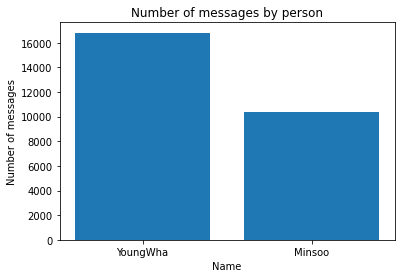

In [ ]:
# Bar plot total number of messages by each one

# Get the counts of messages by each person
counts = df['Name'].value_counts()

# Create a bar plot of the message counts
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Number of messages')
plt.title('Number of messages by person')

# Show the plot
plt.show()

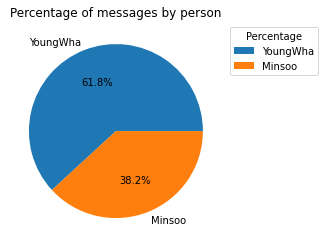

In [ ]:
# Pie chart percentage of messages by each one

# Calculate the total number of messages and the percentages for each person
total_messages = counts.sum()
percentages = counts / total_messages * 100

# Make a pie chart
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')

plt.title('Percentage of messages by person')

# Add legend
plt.legend(title='Percentage', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

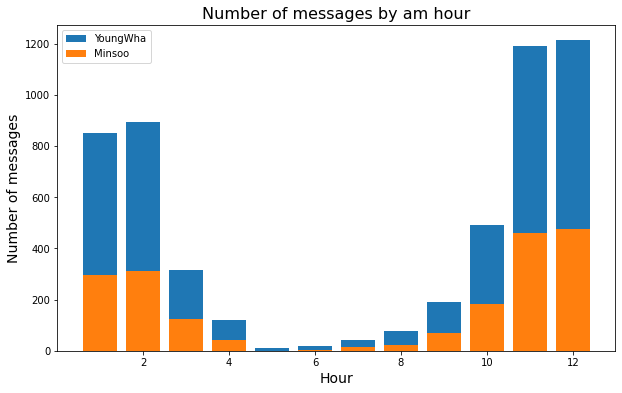

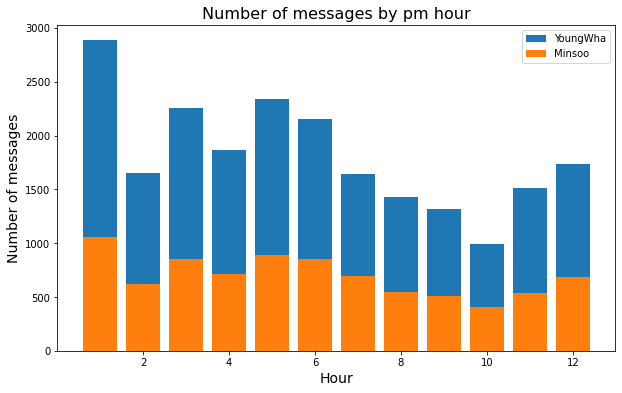

In [ ]:
# The amount of text by each one

########## Am ############
# Extract the hour from the Time column and store it in a new column
df['Hour'] = df['Time'].apply(lambda x: int(x.split()[-1].split(':')[0]))

# Extract the period ('오전' or '오후') from the Time column and store it in a new column
df['Period'] = df['Time'].apply(lambda x: x.split()[0])

# Get the counts of messages by hour for each person
counts_minsoo_am = df[(df['Period']=='오전') & (df['Name']=='Minsoo')]['Hour'].value_counts()
counts_youngwha_am = df[(df['Period']=='오전') & (df['Name']=='YoungWha')]['Hour'].value_counts()

# Create an empty dictionary that will store the hours
hours = {}

# Add the hours from the counts of Minsoo
for hour in counts_minsoo_am.index:
    hours[hour] = None

# Add the hours from the counts of YoungWha
for hour in counts_youngwha_am.index:
    hours[hour] = None

# Get the x-coordinates and y-coordinates for the each person bar plot
x_minsoo = list(hours.keys())
y_minsoo = [counts_minsoo_am.get(hour, 0) for hour in x_minsoo]
x_youngwha = list(hours.keys())
y_youngwha = [counts_youngwha_am.get(hour, 0) for hour in x_youngwha]

# Create a bar plot of the message counts for each hour
plt.figure(figsize=(10, 6))

# Set the bottom parameter to the values of the previous bar to stack the bars
plt.bar(x_youngwha, y_youngwha, bottom=y_minsoo, label='YoungWha')
plt.bar(x_minsoo, y_minsoo, label='Minsoo')

plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of messages', fontsize=14)
plt.title('Number of messages by am hour', fontsize=16)

plt.legend()
plt.show()

########## Pm ############

# Get the counts of messages by hour for each person
counts_minsoo_pm = df[(df['Period']=='오후') & (df['Name']=='Minsoo')]['Hour'].value_counts()
counts_youngwha_pm = df[(df['Period']=='오후') & (df['Name']=='YoungWha')]['Hour'].value_counts()

# Create an empty dictionary that will store the hours
hours = {}

# Add the hours from the counts of Minsoo
for hour in counts_minsoo_pm.index:
    hours[hour] = None

# Add the hours from the counts of YoungWha
for hour in counts_youngwha_pm.index:
    hours[hour] = None

# Get the x-coordinates and y-coordinates for the each person bar plot
x_minsoo = list(hours.keys())
y_minsoo = [counts_minsoo_pm.get(hour, 0) for hour in x_minsoo]
x_youngwha = list(hours.keys())
y_youngwha = [counts_youngwha_pm.get(hour, 0) for hour in x_youngwha]

# Create a bar plot of the message counts for each hour
plt.figure(figsize=(10, 6))

# Set the bottom parameter to the values of the previous bar to stack the bars
plt.bar(x_youngwha, y_youngwha, bottom=y_minsoo, label='YoungWha')
plt.bar(x_minsoo, y_minsoo, label='Minsoo')


plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of messages', fontsize=14)
plt.title('Number of messages by pm hour', fontsize=16)

plt.legend()
plt.show()

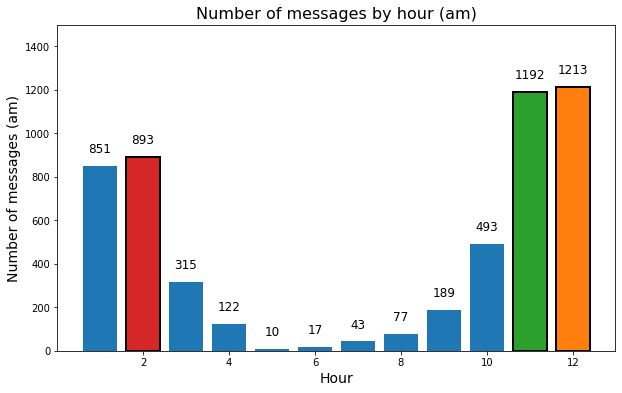

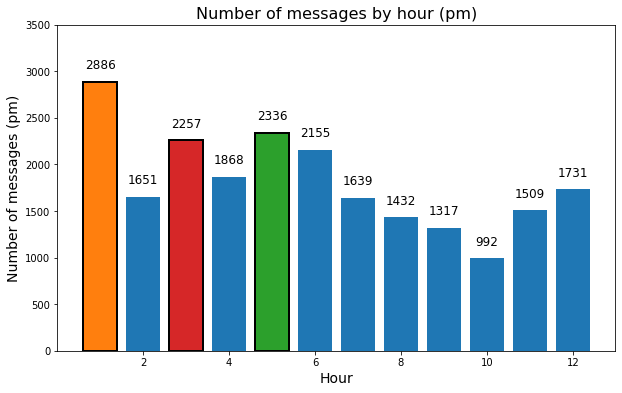

In [ ]:
# Bar plot total number of messages by hour

########## Am ############
# Get the counts of messages by hour
counts = df[df['Period'] == '오전']['Hour'].value_counts()

# Sort the counts by values in descending order
counts = counts.sort_values(ascending=False)
plt.figure(figsize=(10, 6))

# Get the top 3 hours
top_3_hours = counts.index[:3]

# Create a bar plot of the message counts for the hours from 12:00 to 00:00
plt.bar(counts.index, counts.values)
# plt.bar(counts.index, counts.values, color='black')

# Add numbers on top of the bars
for hour, count in counts.items():
    plt.annotate(str(count), xy=(hour, count+2), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of messages (am)', fontsize=14)
plt.title('Number of messages by hour (am)', fontsize=16)

# Highlight the top 3 hours with edgecolor
for hour in top_3_hours:
    plt.bar(hour, counts[hour], edgecolor='black', linewidth=2)

# Adjust y limit
plt.ylim(0,1500)

plt.show()

########## Pm ############

# Get the counts of messages by hour
counts = df[df['Period'] == '오후']['Hour'].value_counts()

# Sort the counts by values in descending order
counts = counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))

# Get the top 3 hours
top_3_hours = counts.index[:3]

# Create a bar plot of the message counts for the hours from 12:00 to 00:00
plt.bar(counts.index, counts.values)

plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of messages (pm)', fontsize=14)
plt.title('Number of messages by hour (pm)', fontsize=16)

# Add numbers on top of the bars
for hour, count in counts.items():
    plt.annotate(str(count), xy=(hour, count+2), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12)

# Adjust y limit
plt.ylim(0,3500)

# Highlight the top 3 hours with edgecolor
for hour in top_3_hours:
    plt.bar(hour, counts[hour], edgecolor='black', linewidth=2)

plt.show()

In [ ]:
# It appears to have the most conversations between 0 a.m. and 2 a.m. and 11 a.m. and 12 a.m. What a night owls
# Let's check the content between 05 and 06 because it stands out that we rarely talked.
# The reason why we had a simple conversation is climbing mountain.
df[((df['Period'] == '오전') & (df['Hour'] == 5)) | ((df['Period'] == '오전') & (df['Hour'] == 6))].sort_values('Hour')[-4:-2]

,Name,Time,Text,Hour,Period
9238,YoungWha,오전 6:09,일어나라,6,오전
9237,YoungWha,오전 6:09,등산가자,6,오전


# Check the keyword

In [ ]:
!python -m pip install --upgrade konlpy

from konlpy.tag import Kkma
from konlpy.utils import pprint
from gensim.models import Word2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 22.3 MB/s eta 0:00:00


In [ ]:
import random

kkma = Kkma()

talk_data = list()
for i in df['Text']:
    talk_data.append(i.split())

random.shuffle(talk_data)

In [ ]:
model_talk = Word2Vec(talk_data, size=100, window=5, min_count=3)

In [ ]:
# Related words with '놀자'
model_talk.most_similar('놀자')

<ipython-input-40-b015e09773a8>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_talk.most_similar('놀자')


[('운동하고', 0.44753462076187134),
 ('쉬어라', 0.44058412313461304),
 ('버스', 0.4173119068145752),
 ('이러고', 0.4170822203159332),
 ('ㅜㅜ', 0.41241931915283203),
 ('무', 0.40871745347976685),
 ('소원이랑', 0.40525445342063904),
 ('등산도', 0.39542996883392334),
 ('자꾸', 0.3916615843772888),
 ('집와서', 0.38642579317092896)]

In [ ]:
# Find most frequent words with nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

# tokenizing the words
text = df['Text'].str.cat(sep=' ')
tokens = nltk.word_tokenize(text)

# Finding the frequency of the words
fdist = FreqDist(tokens)

# Print the most common words
print(fdist.most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('?', 1856), ('ㅋ', 797), ('..', 742), ('거', 628), ('아', 603), ('ㅋㅋㅋ', 510), ('근데', 486), ('ㅎㅎ', 463), ('내', 452), ('ㅇㅇ', 428)]


# Data preprocess for AI Chat

Refer to https://hashdork.com/create-a-deep-learning-chatbot-with-python/

In [ ]:
# Function, extract patterns and responses with specific keyword.

def extract_patterns(df, patterns, tag):# patterns = keywords that I want to extract
    new_df = pd.DataFrame()
    for pattern in patterns:
        matched_msgs = df[df['Text'].str.contains(pattern, flags=re.IGNORECASE, regex=True)]
        matched_msgs['tag'] = tag
        new_df = pd.concat([new_df, matched_msgs])
    return new_df.reset_index(drop=True)

def extract_responses(df, patterns, tag):# The next message in the pattern was set as the response.
    new_df = pd.DataFrame()
    for pattern in patterns:
        matched_msgs = df[df['Text'].str.contains(pattern, flags=re.IGNORECASE, regex=True)]
        for i in matched_msgs.index:
            new_df=new_df.append(df.iloc[i+1])

        
    new_df['Hour'] = new_df['Hour'].astype(int) # The reason why 'Hour' column's type is changed to float64 is that
                                                # I use append method. When it creates a new dataframe the new
                                                # dataframe will be the same as the data type of the columns in the
                                                # original dataframe.
    new_df['tag'] = tag
    return new_df.reset_index(drop=True)

In [ ]:
# Daily tag
patterns = [r'뭐해', r'뭐함', r'ㅁㅎ', r'일정', r'뭐하셈', r'뭐하노', r'ㅁㅎㄴ']
daily_patterns = extract_patterns(df, patterns, '일상_patterns')
daily_responses = extract_responses(df, patterns, '일상_responses')

print('Patterns : \n', daily_patterns[:5],'\n', 'len : ',len(daily_patterns))
print('Patterns : \n', daily_responses[:5],'\n', 'len : ',len(daily_responses))

<ipython-input-43-a8d9ea6d24d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_msgs['tag'] = tag


Patterns : 
        Name      Time             Text  Hour Period          tag
0  YoungWha   오후 2:52  니 누나생일 처음에 뭐해줌?     2     오후  일상_patterns
1  YoungWha   오후 9:41           난 뭐해줄까     9     오후  일상_patterns
2  YoungWha   오전 1:26         등록 뭐해야함?     1     오전  일상_patterns
3  YoungWha   오후 1:11          그럼 뭐해..     1     오후  일상_patterns
4  YoungWha  오후 12:19          연락와서 뭐함    12     오후  일상_patterns 
 len :  92
Patterns : 
        Name      Time                    Text  Hour Period           tag
0    Minsoo   오후 2:56               기억안나노 ㅋㅋㅋ     2     오후  일상_responses
1  YoungWha   오후 9:41     그냥 둘이 소고기 한번 사주면 됑?     9     오후  일상_responses
2  YoungWha   오전 1:26              주차 ㅇㄷ 하던가?     1     오전  일상_responses
3  YoungWha   오후 1:11                       ㅠ     1     오후  일상_responses
4  YoungWha  오후 12:19  근데 뭐 이야기하다가 전화해서미안하다하고    12     오후  일상_responses 
 len :  92


In [ ]:
# Alcohol tag
patterns = [r'술', r'소주', r'맥주', r'양주', r'막걸리', r'소맥', r'쏘맥']
drink_patterns = extract_patterns(df, patterns, '술_patterns')
drink_responses = extract_responses(df, patterns, '술_responses')

print('patterns_len : ',len(drink_patterns))
print('responses_len : ',len(drink_responses))

<ipython-input-43-a8d9ea6d24d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_msgs['tag'] = tag


patterns_len :  380
responses_len :  380


In [ ]:
# Game tag 
patterns = [r'게임', r'겜', r'롤', r'스타', r'스타크래프트', r'스타크레프트', r'스타2', r'배그', r'배틀그라운드']
game_patterns = extract_patterns(df, patterns, '게임_patterns')
game_responses = extract_responses(df, patterns, '게임_responses')

print('patterns_len : ',len(game_patterns))
print('responses_len : ',len(game_responses))

<ipython-input-43-a8d9ea6d24d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_msgs['tag'] = tag


patterns_len :  454
responses_len :  454


In [ ]:
# Workout tag
patterns = [r'운동', r'헬스', r'야스', r'중량', r'스쿼트', r'벤치', r'데드', r'데드리프트', r'벤치프레스', r'3대', r'맨몸운동', r'등산', r'수영', r'클라이밍']
workout_patterns = extract_patterns(df, patterns, '운동_patterns')
workout_responses = extract_responses(df, patterns, '운동_responses')

print('patterns_len : ',len(workout_patterns))
print('responses_len : ',len(workout_responses))

<ipython-input-43-a8d9ea6d24d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_msgs['tag'] = tag


patterns_len :  532
responses_len :  532


# ChatBot_1

Extract patterns which contain specific words.
For example, tag 'alcohol' which contains 'soju', 'beer', 'whisky'...
The next message in the pattern was set as the response

However problem is that there are too many patterns and responses so training model takes too long.

In [ ]:
# Function, make extracted patterns and responses to list.
def create_lists(patterns_df, responses_df):
    pat_list = list(patterns_df['Text'])
    res_list = list(responses_df['Text'])
    return pat_list,res_list

json_game_pat, json_game_res = create_lists(game_patterns, game_responses)
json_workout_pat, json_workout_res = create_lists(workout_patterns, workout_responses)
json_drink_pat, json_drink_res = create_lists(drink_patterns, drink_responses)
json_daily_pat, json_daily_res = create_lists(daily_patterns, daily_responses)

In [ ]:
# Make dictionary for generating json
text_data = {
    "intents":[
        {
            "tag": "술",
         "patterns": json_drink_pat,
         "responses": json_drink_res
        },
        {
            "tag": "게임",
         "patterns": json_game_pat,
         "responses": json_game_res
        },
        {
            "tag": '운동',
         "patterns": json_workout_pat,
         "responses": json_workout_res
        },
        {
            "tag": '일상',
         "patterns": json_daily_pat,
         "responses": json_daily_res
        }
    ]
}

In [ ]:
# Open json
import json

with open('intents.json', 'w') as file:
    json.dump(text_data, file, indent=4)

In [ ]:
import tensorflow

with open('intents.json') as file:
    data = json.load(file)

In [ ]:
# Make word list using tokenize
words = []
labels = []
docs_x = []
docs_y = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        wrds = nltk.word_tokenize(pattern)
        words.extend(wrds)
        docs_x.append(wrds)
        docs_y.append(intent['tag'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

In [ ]:
# Morphological analysis
words = [stemmer.stem(w) for w in words if w != "?"] # word collection of all patterns
words = sorted(list(set(words)))
labels = sorted(labels)

In [ ]:
training = []
output = []

# Make as many tag labels as there are.
out_empty = [0 for _ in range(len(labels))]


for x, doc in enumerate(docs_x):
    bag = []
    # Make word to lower case if there is english letter
    wrds = [stemmer.stem(w.lower()) for w in doc]

    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)

    output_row = out_empty[:]
    output_row[labels.index(docs_y[x])] = 1

    training.append(bag)
    output.append(output_row)

In [ ]:
def bag_of_words(s,words):
    # make [0,0,0, .... ,0] by the length of the pattern(len(words))
    bag = [0 for _ in range(len(words))]

    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    # If ['Hello', 'mate', '!'], return 'Hello' corresponding the pattern.
    # For example [0,0,0,0,0,1,0,0,0,...,0]
    for se in s_words:
        for i,w in enumerate(words):
            if w == se:
                bag[i] =1
    return np.array(bag)

In [ ]:
training = np.array(training)
output = np.array(output)

In [ ]:
!pip install tflearn
import tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=6439b74997766722e3f91fe6c99feedd5a13728e7874e223d15b6646c79c75f4
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
tensorflow.compat.v1.reset_default_graph()

net = tflearn.input_data(shape=[None, len(training[0])]) # len(training[[0]]) 로드할 model과 설정한 model 배열 체크하기
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(output[0]), activation = 'softmax') # len(output[0]) aswell
net = tflearn.regression(net)

model = tflearn.DNN(net)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# model.fit(training, output, n_epoch=1500, batch_size = 8, show_metric=True)
# model.save("model.tflearn")

''' The result

Training Step: 344999  | total loss: 0.05232 | time: 1.386s
| Adam | epoch: 1500 | loss: 0.05232 - acc: 0.9549 -- iter: 1832/1837
Training Step: 345000  | total loss: 0.06027 | time: 1.392s
| Adam | epoch: 1500 | loss: 0.06027 - acc: 0.9469 -- iter: 1837/1837
--
'''
# it takes 4 hours... need to change something

In [ ]:
# def chat():
#     print("Start talking with your bot (type quit to stop)!")
#     while True:
#         inp = input("You: ")
#         if inp.lower() == "quit":
#             break

#         # Show predictions of what tag is most likely
#         results = model.predict([bag_of_words(inp, words)])

#         # Pick the highest probability of predictions
#         results_index = np.argmax(results)

#         # Designate tag
#         tag = labels[results_index]

#         for tg in data["intents"]:
#             if tg["tag"] == tag:
#                 responses = tg['responses']

#         print(random.choice(responses))

# chat()

# ChatBot_2

Extract patterns which have question mark "?" in end of text containing specific words. The next message in the pattern was set as the response like before.

The result, the amount of messeges is clearly smaller than before model so it takes lower time.

In [ ]:
def extract_test_pat(df_text, patterns):
    new_list = list([i for i in df_text if any(word in i for word in patterns) and i[-1] == '?'])
    return new_list

def extract_test_res(df_text, patterns):
    new_list = list()
    for i,x in enumerate(df['Text']):
        if any(word in x for word in patterns) and x[-1] == '?':
            new_list.append(df['Text'][i+1])
    return new_list

In [ ]:
target = df['Text']

tag_drink = [r'술', r'소주', r'맥주', r'양주', r'막걸리', r'소맥', r'쏘맥', r'고량주', r'꼬량주']
drink_pat_test = extract_test_pat(target, tag_drink)
drink_res_test = extract_test_res(target, tag_drink)

tag_daily = [r'뭐해', r'뭐함', r'ㅁㅎ', r'일정', r'뭐하셈', r'뭐하노', r'ㅁㅎㄴ']
daily_pat_test = extract_test_pat(target, tag_daily)
daily_res_test = extract_test_res(target, tag_daily)

tag_workout = [r'운동', r'헬스', r'야스', r'중량', r'스쿼트', r'벤치', r'데드', r'데드리프트', r'벤치프레스', r'3대', r'맨몸운동', r'등산', r'수영', r'클라이밍']
workout_pat_test = extract_test_pat(target, tag_workout)
workout_res_test = extract_test_res(target, tag_workout)

tag_game = [r'게임', r'겜', r'롤', r'스타', r'스타크래프트', r'스타크레프트', r'스타2', r'배그', r'배틀그라운드']
game_pat_test = extract_test_pat(target, tag_game)
game_res_test = extract_test_res(target, tag_game)

In [ ]:
text_data_test = {
    "intents":[
        {
            "tag": "술",
         "patterns": drink_pat_test,
         "responses": drink_res_test
        },
        {
            "tag": "게임",
         "patterns": game_pat_test,
         "responses": game_res_test
        },
        {
            "tag": '운동',
         "patterns": workout_pat_test,
         "responses": workout_res_test
        },
        {
            "tag": '일상',
         "patterns": daily_pat_test,
         "responses": daily_res_test
        }
    ]
}

In [ ]:
with open('intents.json', 'w') as file:
    json.dump(text_data_test, file, indent=4)

In [ ]:
with open('intents.json') as file:
    data = json.load(file)

In [ ]:
words = []
labels = []
docs_x = []
docs_y = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        wrds = nltk.word_tokenize(pattern)
        words.extend(wrds)
        docs_x.append(wrds)
        docs_y.append(intent['tag'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

In [ ]:
stemmer = LancasterStemmer()
words = [stemmer.stem(w) for w in words if w != "?"]
words = sorted(list(set(words)))
labels = sorted(labels)

In [ ]:
training = []
output = []

out_empty = [0 for _ in range(len(labels))]

for x, doc in enumerate(docs_x):
    bag = []
    wrds = [stemmer.stem(w.lower()) for w in doc]

    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)

    output_row = out_empty[:]
    output_row[labels.index(docs_y[x])] = 1

    training.append(bag)
    output.append(output_row)

In [ ]:
training = np.array(training)
output = np.array(output)

In [ ]:
tensorflow.compat.v1.reset_default_graph()

net = tflearn.input_data(shape=[None, len(training[0])]) # len(training[[0]]) Check the model to load and its array
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(output[0]), activation = 'softmax') # len(output[0]) as well
net = tflearn.regression(net)

model = tflearn.DNN(net)
# The 'tflearn.DNN()' function automatically sets up the optimizer and loss function
# So it is not necessary to compile the model manually.

In [ ]:
# model.fit(training, output, n_epoch=1500, batch_size = 8, show_metric=True)
# model.save("model2.tflearn")

"""
Training Step: 25499  | total loss: 0.02332 | time: 0.066s
| Adam | epoch: 1500 | loss: 0.02332 - acc: 0.9959 -- iter: 128/136
Training Step: 25500  | total loss: 0.03338 | time: 0.070s
| Adam | epoch: 1500 | loss: 0.03338 - acc: 0.9838 -- iter: 136/136
"""
load_path = '/content/drive/My Drive/git/Messege_Analysis/'
model.load(load_path + "model2.tflearn")

In [ ]:
def chat():
    print("Start talking with your bot (type quit to stop)!")
    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        results = model.predict([bag_of_words(inp, words)])
        results_index = np.argmax(results)
        tag = labels[results_index]
        #print(tag)

        for tg in data["intents"]:
            if tg["tag"] == tag:
                responses = tg['responses']

        print(random.choice(responses))

chat()

# We usually have a useless conversation (like he say 'hey what are you doing?' I reply " :) haha " for disturbing each other...)
# sometimes look so weird conversation... haha

Start talking with your bot (type quit to stop)!
You: 술 한잔 ㄱㄱ?
전에 바나나꿀막걸리 이런거 어떻노
You: 오 괜찮노 ㅋㅋ 맥주는?
노오옵
You: 음 그럼 게임이나 한판 하자
사진
You: ? 게임이나 하자고
ㅜ
You: 왜 ㅡㅡ 안할거임?
ㅋㅋㅋㅋㅋ
You: 안할거냐고!
노오옵
You: quit


# Extra Analysis
Sometimes insight comes out from a wild ideas

In [ ]:
# We usually type 'ㅋ' whenever. So let's check how average we type 'ㅋ'
target_y = df['Text'][(df['Text'].str.contains('ㅋ', flags=re.IGNORECASE, regex=True)) & (df['Name']=='YoungWha')]
target_m = df['Text'][(df['Text'].str.contains('ㅋ', flags=re.IGNORECASE, regex=True)) & (df['Name']=='Minsoo')]
print("Minsoo's average of the number of 'ㅋ'   :", target_m.str.count("ㅋ").mean(), "\nYoungWha's average of the number of 'ㅋ' :", target_y.str.count("ㅋ").mean())

Minsoo's average of the number of 'ㅋ'   : 3.50627195183141 
YoungWha's average of the number of 'ㅋ' : 3.9467455621301775


In [ ]:
# Guess who's text
# def guess_who

from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# How long does it take
start = time.time()

# Create feature matrix and target vector
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Text"])
y = df["Name"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
clf = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=4)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy and time
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
n = time.time()-start
print("Processing time :","%.3f" % n)

Accuracy: 0.6745126884884148
Processing time : 10.499


In [ ]:
def guess_who():
    print('Type "quit" if you want to quit')
    while True:
        inp = input('Input Text :')
        if inp.lower() == 'quit':
            break
        
        inp_vector = vectorizer.transform([inp]) # Transform text into feature matrix
        name = clf.predict(inp_vector)[0] # Predict name
        print('Expected person :',name)

guess_who()

Type "quit" if you want to quit
Input Text :카페 ㄱㄱ?
Expected person : Minsoo
Input Text :뭐함
Expected person : YoungWha
Input Text :공부하자
Expected person : YoungWha
Input Text :점심 먹고나서
Expected person : Minsoo
Input Text :ㅋㅋ
Expected person : Minsoo
Input Text :quit


Above chat models are just one-dimension. To have much complex conversation, I should study rule-based systems or more advanced techniques like seq2seq.